In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data = pd.read_csv('salaries.csv')
data.head()

,Function,sup1,sup2,sup3,sup4,sup5,salary,gender,disabled,race,...,inst4,inst5,instBudget,City,State,Zip,country,Category,instSize,instType
0,position1,16,1,0,350,135,125000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
1,position3,7,0,0,320,120,92000,Woman,False,Other,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
2,position3,4,0,0,25,15,88000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
3,position5,0,0,0,5,0,75000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
4,position18,0,0,0,0,0,67000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution


In [23]:
data.mean()

sup1                       1.425292
sup2                       0.737549
sup3                       0.600693
sup4                      49.776527
sup5                       4.090515
salary                 49234.686712
disabled                   0.012993
yearsInPosition            5.690508
yearsInProfession          9.331236
age                       38.257220
cred1                      0.067129
cred2                      0.031615
inst1                     16.575574
inst2                      6.470333
inst3                      3.541793
inst4                    334.433088
inst5                     41.038545
instBudget           4751711.388732
instSize               25066.208858
dtype: float64

In [24]:
#  are there missing values
data.isnull().any()

Function              True
sup1                 False
sup2                 False
sup3                 False
sup4                 False
sup5                 False
salary                True
gender                True
disabled             False
race                  True
yearsInPosition       True
yearsInProfession     True
age                   True
cred1                False
cred2                False
highestDegree         True
inst1                False
inst2                False
inst3                False
inst4                False
inst5                False
instBudget            True
City                 False
State                False
Zip                  False
country              False
Category             False
instSize              True
instType              True
dtype: bool

In [16]:
# # eliminate missing values (NaN)
# data['mSalary'] = pd.isnull(data['salary'])
# data['mFunction'] = pd.isnull(data['Function'])
# data['mGender'] = pd.isnull(data['gender'])
# data['mRace'] = pd.isnull(data['race'])
# data['mYearsInPosition'] = pd.isnull(data['yearsInPosition'])
# data['mYearsInProfession'] = pd.isnull(data['yearsInProfession'])
# data['mAge'] = pd.isnull(data['age'])
# data['mHighestDegree'] = pd.isnull(data['highestDegree'])
# data['mInstBudget'] = pd.isnull(data['instBudget'])
# data['mInstSize'] = pd.isnull(data['instSize'])
# data['mInstType'] = pd.isnull(data['instType'])

# data2 = data[(data.mSalary == False)
#              & (data.mFunction == False)
#              & (data.mGender == False)
#              & (data.mRace == False)
#              & (data.mYearsInPosition == False)
#              & (data.mYearsInProfession == False)
#              & (data.mAge == False)
#              & (data.mHighestDegree == False)
#              & (data.mInstBudget == False)
#              & (data.mInstSize == False)
#              & (data.mInstType == False)]

In [25]:
# replacing null values with filler

data['salary'] = np.where(pd.isnull(data['salary']) == True, 'no salary given', data['salary'])
data['Function'] = np.where(pd.isnull(data['Function']) == True, 'no Function given', data['Function'])
data['gender'] = np.where(pd.isnull(data['gender']) == True, 'no gender given', data['gender'])
data['race'] = np.where(pd.isnull(data['race']) == True, 'no race given', data['race'])
data['yearsInPosition'] = np.where(pd.isnull(data['yearsInPosition']) == True, 'no yearsInPosition given', data['yearsInPosition'])
data['yearsInProfession'] = np.where(pd.isnull(data['yearsInProfession']) == True, 'no yearsInProfession given', data['yearsInProfession'])
data['age'] = np.where(pd.isnull(data['age']) == True, 'no age given', data['age'])
data['highestDegree'] = np.where(pd.isnull(data['highestDegree']) == True, 'no highestDegree given', data['highestDegree'])
data['instBudget'] = np.where(pd.isnull(data['instBudget']) == True, 'no instBudget given', data['instBudget'])
data['instSize'] = np.where(pd.isnull(data['instSize']) == True, 'no instSize given', data['instSize'])
data['instType'] = np.where(pd.isnull(data['instType']) == True, 'no instType given', data['instType'])

In [27]:
# making sure all values are filled in
data.isnull().any()

Function             False
sup1                 False
sup2                 False
sup3                 False
sup4                 False
sup5                 False
salary               False
gender               False
disabled             False
race                 False
yearsInPosition      False
yearsInProfession    False
age                  False
cred1                False
cred2                False
highestDegree        False
inst1                False
inst2                False
inst3                False
inst4                False
inst5                False
instBudget           False
City                 False
State                False
Zip                  False
country              False
Category             False
instSize             False
instType             False
dtype: bool

In [37]:
# define x
x_gender = data.gender.values.reshape(data.shape[0], 1)
x_disabled = data.disabled.values.reshape(data.shape[0], 1)
x_race = data.race.values.reshape(data.shape[0], 1)
x_yearsInPosition = data.yearsInPosition.values.reshape(data.shape[0], 1)
x_yearsInProfession = data.yearsInProfession.values.reshape(data.shape[0], 1)
x_age = data.age.values.reshape(data.shape[0], 1)
x_highestDegree = data.highestDegree.values.reshape(data.shape[0], 1)
x_instBudget = data.instBudget.values.reshape(data.shape[0], 1)
x_instSize = data.instSize.values.reshape(data.shape[0], 1)
x_instType = data.instType.values.reshape(data.shape[0], 1)

X = np.concatenate((x_gender,
                    x_disabled,
                    x_race,
                    x_yearsInPosition,
                    x_yearsInProfession,
                    x_age,
                    x_highestDegree,
                    x_instBudget,
                    x_instSize,
                    x_instType), axis=1)

In [34]:
# define y
y = data.salary.values

In [35]:
# arbitrarily define a linear model
m = 2000
b = 10000

In [ ]:
# plot X and y (blue) and linear model (red)
plt.scatter(X, y)
plt.plot(X, m*X + b, color='red')
plt.show()

In [38]:
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X = X.reshape(-1, 1)
regr.fit(X, y)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, y))
#vector of prediction error
print('Distribution of prediction error:')
predError = regr.predict(X) - y
plt.hist(predError)
plt.show()

ValueError: could not convert string to float: 'no instType given'

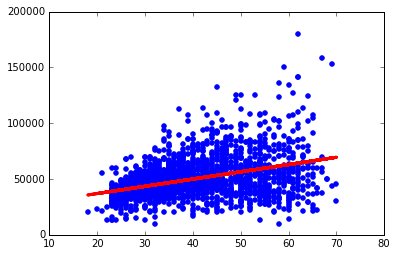

In [12]:
# Plot outputs
plt.scatter(X, y,  color='blue')
plt.plot(X, regr.predict(X), color='red',
         linewidth=3)
plt.show()